In [6]:
# read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('D:\\python\\SoilNet\\results\\RUN_D_2023_05_25_T_11_30_Nafiseh.csv')

In [7]:
# get column names
df.columns

Index(['point_id', 'y_real', 'y_pred'], dtype='object')

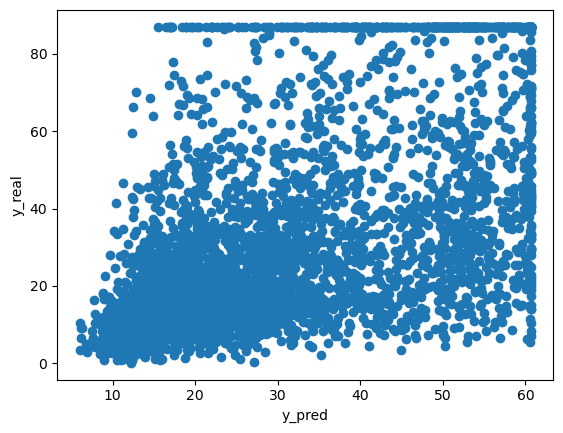

In [8]:
# scatter plotting columns y_pred and y_real
plt.scatter(df['y_pred']*87, df['y_real']*87)
plt.xlabel('y_pred')
plt.ylabel('y_real')
plt.show()



In [61]:
y_pred = df['y_pred'].values * 87
y_real = df['y_real'].values * 87
mae = np.abs(y_pred - y_real)
print('MAE: ', np.mean(mae))

MAE:  14.38599736782081


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_mean_mae(y_real, mae, step=5):
    # Calculate the mean MAE for each step
    mean_mae = []
    steps = []
    counts = []
    for i in range(0, int(np.max(y_real)), step):
        mean_mae.append(np.mean(mae[np.logical_and(y_real >= i, y_real < i+step)]))
        count = np.sum(np.logical_and(y_real >= i, y_real < i+step))
        steps.append(f"{i}-{i+step-1}")
        counts.append(count)

    plt.figure(figsize=(20, 10))
    # Create a ScalarMappable object to map colors to counts
    norm = plt.Normalize(min(counts), max(counts))
    cmap = cm.get_cmap('coolwarm')
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    # Plot the bar plot with colored bars
    bars = plt.bar(steps, mean_mae, color=sm.to_rgba(counts))

    # Create a color legend
    cbar = plt.colorbar(sm)
    cbar.set_label('Counts')

    # Rotate x-axis labels
    plt.xticks(rotation=45)

    plt.xlabel('OC Steps')
    plt.ylabel('Mean MAE')
    plt.title('Mean MAE per OC Step')
    plt.show()



C:\Users\moi3n\AppData\Local\Temp\ipykernel_28248\919499535.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


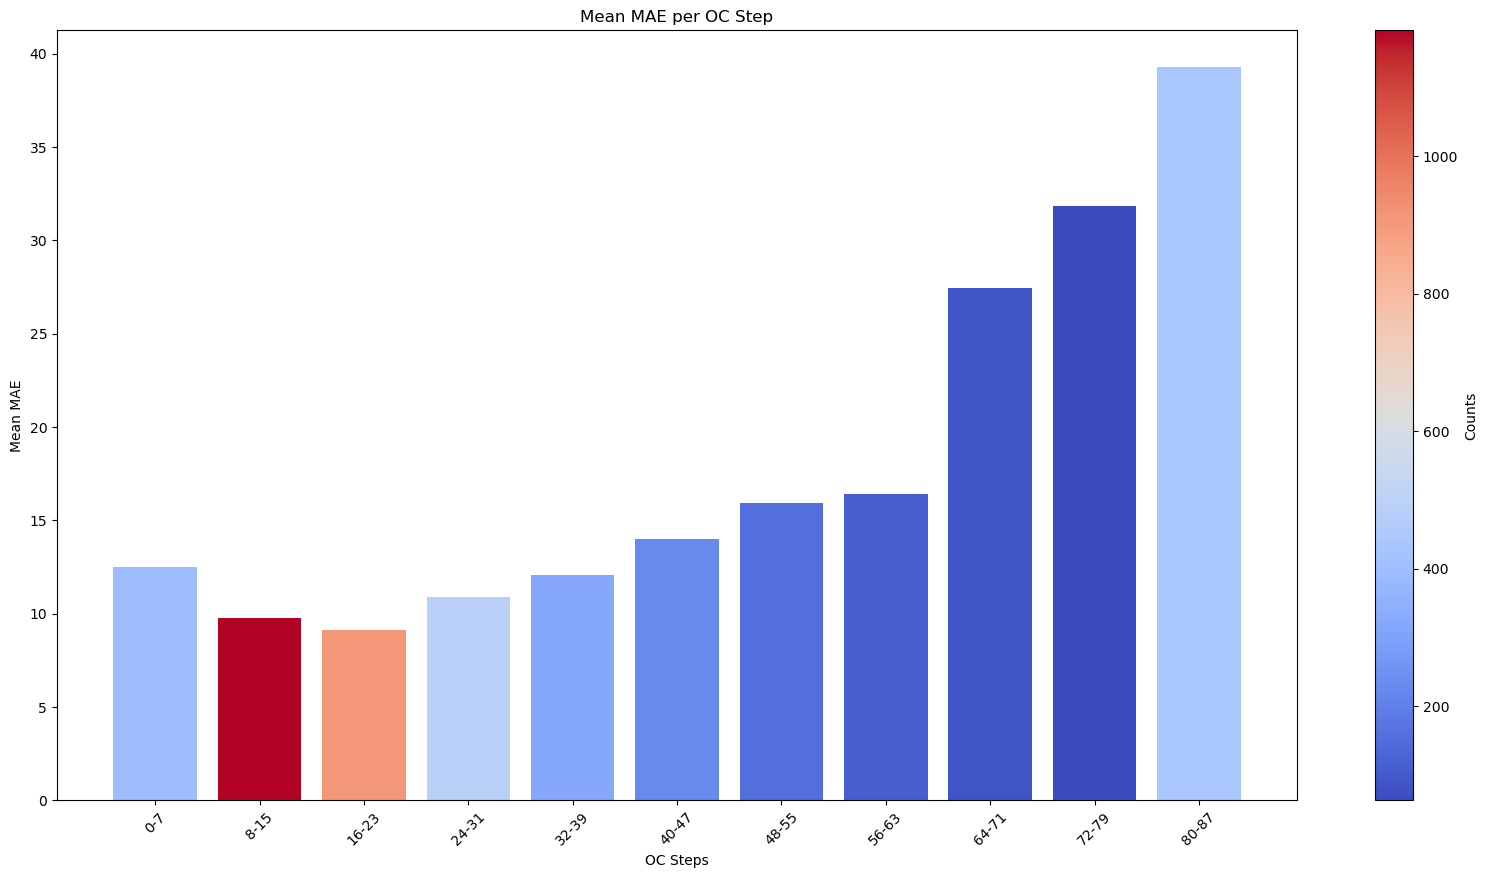

In [71]:
plot_mean_mae(y_real, mae, 8)